In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds #con esta libreria accedemos al set de datos

In [2]:
datos,metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)  #Especificamos el dataset a utilizar (fashion_mnist) y separamos data de metadata
#Los dos atributos adicionales es para que se descargue con todos los metadatos necesarios

In [3]:
datos_entrenamiento, datos_pruebas = datos ['train'], datos['test'] #separo los datos de entrenamiento y los de test (ya vienen separados en estos tags desde el dataset)

In [4]:
nombres_clases = metadatos.features['label'].names #visualizamos las categorias existentes
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
#Normalizar datos (pasar de 0-255(valores de los pixeles) a 0-1). Esto para acelerar el entrenamiento y optimizar resultados

def normalizar(imagenes,etiquetas): #creamos al funcion para normalizar
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 #Divide cada pixel entre 255
    return imagenes, etiquetas

#Normaliza los datos de entrenamiento y pruebas con la función anterior
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usa memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


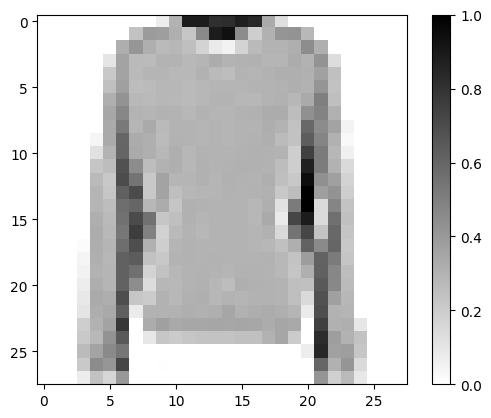

In [6]:
#OPCIONAL
#Mostrar una imagen de los datos de pruebas, de momento solo la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar

import matplotlib.pyplot as plt

#Dibujar imagen
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

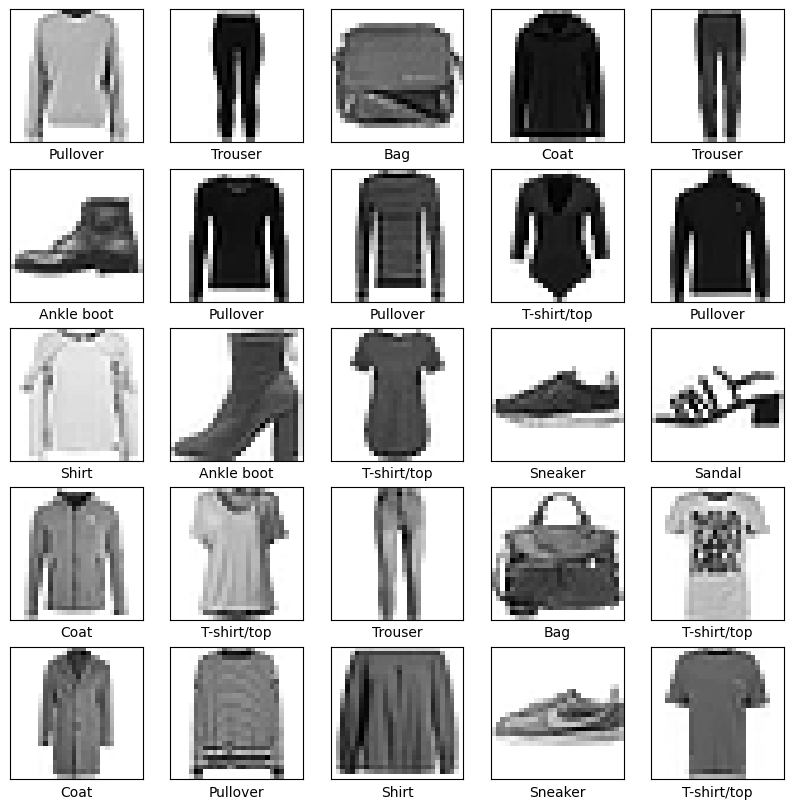

In [7]:
#OPCIONAL
#Dibujar mas cantidad incluyendo tag
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [8]:
#Crear modelo
modelo=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #Definimos la capa de entrada manualmente(Flatten).Se encarga de convertir la matriz y "aplastarla" a una sola dimensión con 784 neuronas (1 x pixel)
    #input_shape= 28*28 pixel  //  x,x,1 = 1 canal porque es en blanco y negro
    tf.keras.layers.Dense(150, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu), #2 capas ocultas de 50 neuronas con activación relu # Agrego atra capa y 100 neuronas
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) #Salida con 10 neuronas (1 x cada tipo de prenda segun tags del dataset). 
    #Utilizando la activación softmax, ideal para redes de clasificación. En resumen, selecciona la salida con mayor "certeza"
])


c:\Users\Mauro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#Compilar modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
#Obtengo la cantidad de datos para entrenamientos y pruebas

num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [11]:
#Para optimizar el tiempo de entrenamiento lo realizamos en lotes

TAMANO_LOTE=32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE) #con ayuda de repeat y shuffle el orden de los datos serán aleatorios. Batch le indica el tamaño de lote de entrenamiento
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE) #Para las pruebas solo utilizamos el batch

In [12]:
#Entrenar la red
import math

historial = modelo.fit(datos_entrenamiento, epochs=200, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - accuracy: 0.7860 - loss: 0.6247
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8619 - loss: 0.3743
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.8784 - loss: 0.3330
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.8847 - loss: 0.3121
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.8905 - loss: 0.2945
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8953 - loss: 0.2772
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.9029 - loss: 0.2611
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9031 - loss: 0.2592
Epoch 9/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9089 - loss: 0.2453
Epoch 10/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9119 - loss: 0.2356  
Epoch 11/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9164 - loss: 0.2

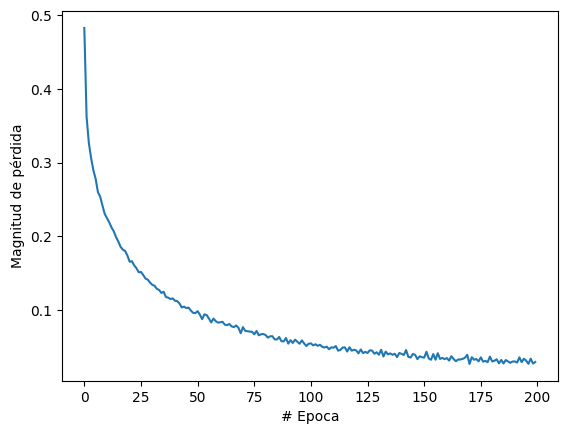

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


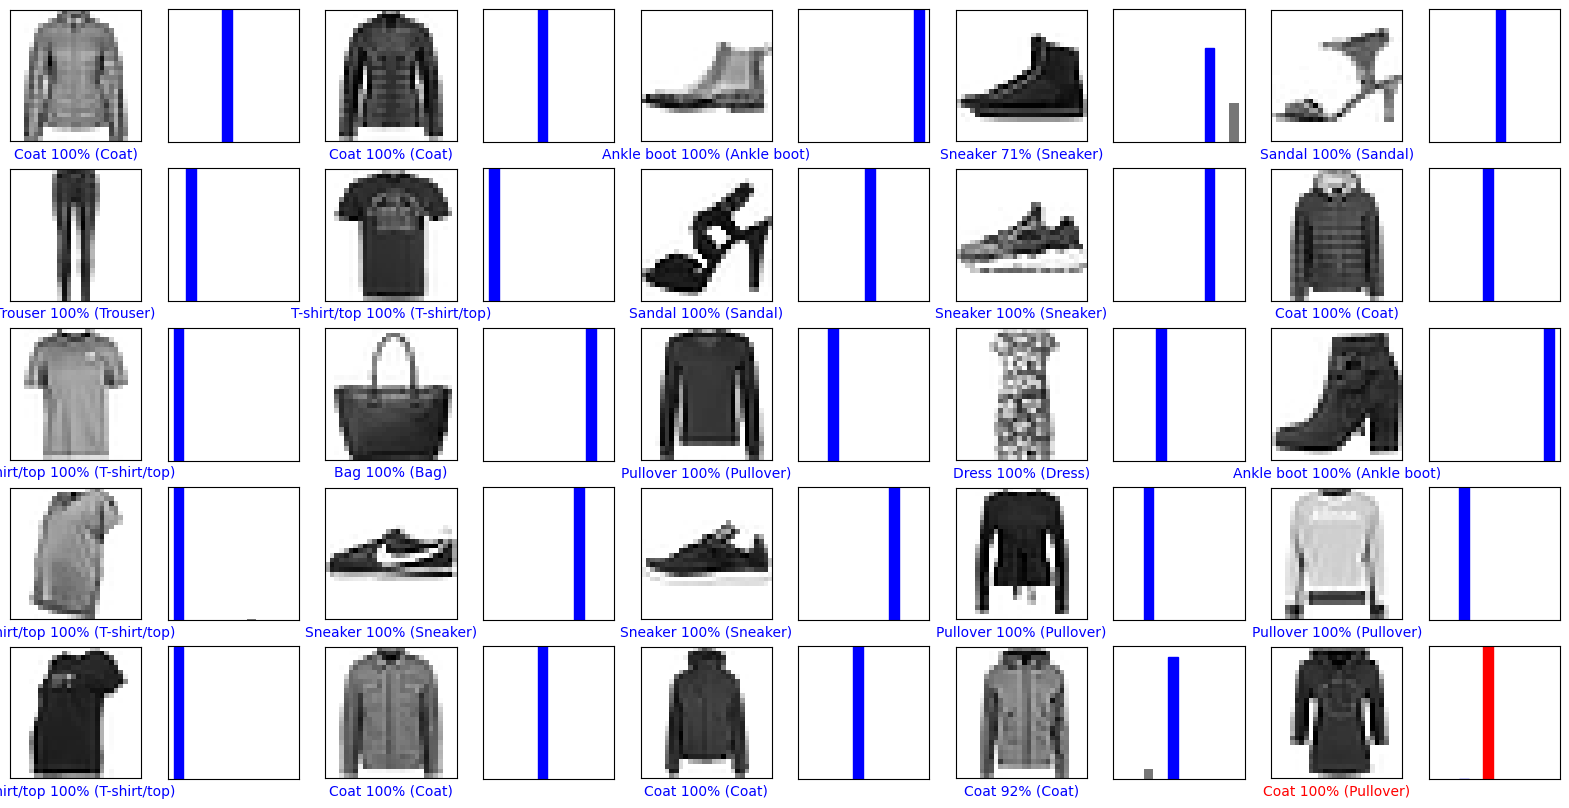

In [14]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)